# 令和７年度 大学入学共通テスト

* https://www.dnc.ac.jp/kyotsu/hyouka/r7_hyouka/r7_data.html
* [CSV](https://www.dnc.ac.jp/albums/abm.php?d=770&f=abm00005379.csv&n=02_%E7%A7%91%E7%9B%AE%E5%88%A5%E6%88%90%E7%B8%BE%E5%88%86%E5%B8%83%EF%BC%88%E4%BB%A4%E5%92%8C%EF%BC%97%E5%B9%B4%E5%BA%A6%E5%A4%A7%E5%AD%A6%E5%85%A5%E5%AD%A6%E5%85%B1%E9%80%9A%E3%83%86%E3%82%B9%E3%83%88%E6%9C%AC%E8%A9%A6%E9%A8%93__%E5%85%A8%E6%95%99%E7%A7%91%E3%83%BB%E7%A7%91%E7%9B%AE%EF%BC%89.csv)

In [1]:
# 共通テストの結果のCSVファイルのURL
url_csv = "https://www.dnc.ac.jp/albums/abm.php?d=770&f=abm00005379.csv&n=02_%E7%A7%91%E7%9B%AE%E5%88%A5%E6%88%90%E7%B8%BE%E5%88%86%E5%B8%83%EF%BC%88%E4%BB%A4%E5%92%8C%EF%BC%97%E5%B9%B4%E5%BA%A6%E5%A4%A7%E5%AD%A6%E5%85%A5%E5%AD%A6%E5%85%B1%E9%80%9A%E3%83%86%E3%82%B9%E3%83%88%E6%9C%AC%E8%A9%A6%E9%A8%93__%E5%85%A8%E6%95%99%E7%A7%91%E3%83%BB%E7%A7%91%E7%9B%AE%EF%BC%89.csv"

"https://www.dnc.ac.jp/albums/abm.php?d=770&f=abm00005379.csv&n=02_%E7%A7%91%E7%9B%AE%E5%88%A5%E6%88%90%E7%B8%BE%E5%88%86%E5%B8%83%EF%BC%88%E4%BB%A4%E5%92%8C%EF%BC%97%E5%B9%B4%E5%BA%A6%E5%A4%A7%E5%AD%A6%E5%85%A5%E5%AD%A6%E5%85%B1%E9%80%9A%E3%83%86%E3%82%B9%E3%83%88%E6%9C%AC%E8%A9%A6%E9%A8%93__%E5%85%A8%E6%95%99%E7%A7%91%E3%83%BB%E7%A7%91%E7%9B%AE%EF%BC%89.csv"

In [2]:
# IPAフォントを手動でインストール ⇒ https://moji.or.jp/ipafont/ipa00303/
# このノートブックでは"ipag"フォントを使用する。
haskey(ENV, "COLAB_GPU") && run(`apt-get -y install fonts-ipafont-gothic`)

false

In [3]:
# Google Colabと自分のパソコンの両方で使えるようにするための工夫

using Pkg

"""すでにPkg.add済みのパッケージのリスト"""
_packages_added = [sort!(readdir(Sys.STDLIB));
    sort!([info.name for (uuid, info) in Pkg.dependencies() if info.is_direct_dep])]

"""_packages_added内にないパッケージをPkg.addする"""
add_pkg_if_not_added_yet(pkg) = if isnothing(Base.find_package(pkg))
    println(stderr, "# $(pkg).jl is not added yet, so let's add it.")
    Pkg.add(pkg)
end

"""expr::Exprからusing内の`.`を含まないモジュール名を抽出"""
function find_using_pkgs(expr::Expr)
    pkgs = String[]
    function traverse(expr::Expr)
        if expr.head == :using
            for arg in expr.args
                if arg.head == :. && length(arg.args) == 1
                    push!(pkgs, string(arg.args[1]))
                elseif arg.head == :(:) && length(arg.args[1].args) == 1
                    push!(pkgs, string(arg.args[1].args[1]))
                end
            end
        else
            for arg in expr.args arg isa Expr && traverse(arg) end
        end
    end
    traverse(expr)
    pkgs
end

"""必要そうなPkg.addを追加するマクロ"""
macro autoadd(expr)
    pkgs = find_using_pkgs(expr)
    :(add_pkg_if_not_added_yet.($(pkgs)); $expr)
end

@autoadd

In [4]:
ENV["LINES"] = 200

@autoadd begin
using CSV
using Downloads
using DataFrames
using Plots
default(fmt = :png, size = (600, 400),
    titlefontsize = 10, plot_titlefontsize = 12)
default(fontfamily="ipag") # 日本語フォントの利用
using StringEncodings
end

In [5]:
file_csv = Downloads.download(url_csv)
string_csv = decode(read(file_csv), enc"CP932")
split_csv = split(string_csv, "\r\n")

KEY = String[]
SUMMARY = Dict{String, Dict}()
DF = Dict{String, DataFrame}()

x = [split_csv[1]]
for l in split_csv[2:end]
    if l == "" || occursin(r"^令和.年度", l)
        key = split(x[3], ',')[1] * "_" * split(x[1], ',')[1]
        push!(KEY, key)
        summary = Dict(zip(split(x[2], ','), split(x[3], ',')))
        delete!(summary, "")
        SUMMARY[key] = summary
        y = (l -> join(split(l, ',')[1:3], ',')).(x[4:end])
        df = CSV.read(IOBuffer(join(y, "\n")), DataFrame)
        DF[key] = df
        x = [l]
        continue
    end
    occursin(r"^.段階", l) && continue
    push!(x, l)
end
DF

Dict{String, DataFrame} with 58 entries:
  "旧情報_令和７年度 科目… => 101×3 DataFrame…
  "数学Ⅰ_令和７年度 科目別… => 101×3 DataFrame…
  "化学基礎_令和７年度 科… => 51×3 DataFrame…
  "国　語_令和７年度 教科… => 201×3 DataFrame…
  "生物_令和７年度 科目別… => 101×3 DataFrame…
  "地理総合_令和７年度 科… => 51×3 DataFrame…
  "物理基礎_令和７年度 科… => 51×3 DataFrame…
  "旧現代社会_令和７年度 … => 101×3 DataFrame…
  "公共，倫理_令和７年度 … => 101×3 DataFrame…
  "旧倫理_令和７年度 科目… => 101×3 DataFrame…
  "外国語_令和７年度 教科… => 201×3 DataFrame…
  "地理総合／歴史総合／公… => 51×3 DataFrame…
  "公民_令和７年度 教科別… => 101×3 DataFrame…
  "化学_令和７年度 科目別… => 101×3 DataFrame…
  "英語（リーディング）_令… => 101×3 DataFrame…
  "情報Ⅰ_令和７年度 科目別… => 101×3 DataFrame…
  "生物基礎_令和７年度 科… => 51×3 DataFrame…
  "旧情報関係基礎_令和７年… => 101×3 DataFrame…
  "中国語_令和７年度 科目… => 201×3 DataFrame…
  "旧数学Ⅱ・旧数学Ｂ_令和… => 101×3 DataFrame…
  "旧日本史Ａ_令和７年度 … => 101×3 DataFrame…
  "旧簿記・会計_令和７年度… => 101×3 DataFrame…
  "理科_令和７年度 教科別… => 101×3 DataFrame…
  "歴史総合_令和７年度 科… => 51×3 DataFrame…
  "韓国語_令和７年度 科目… => 201×3 DataFrame…
  "地学_令和７年度 科目別… => 101×3 DataFrame…
  

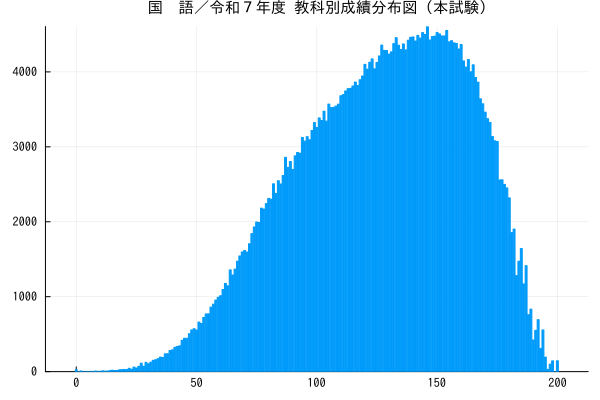

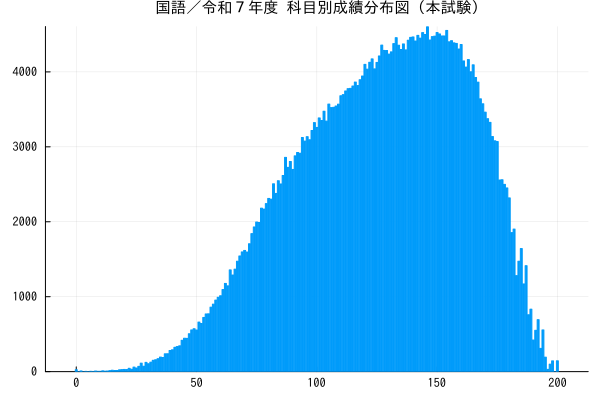

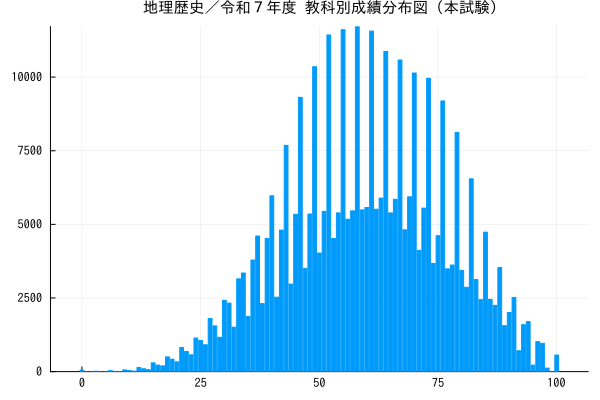

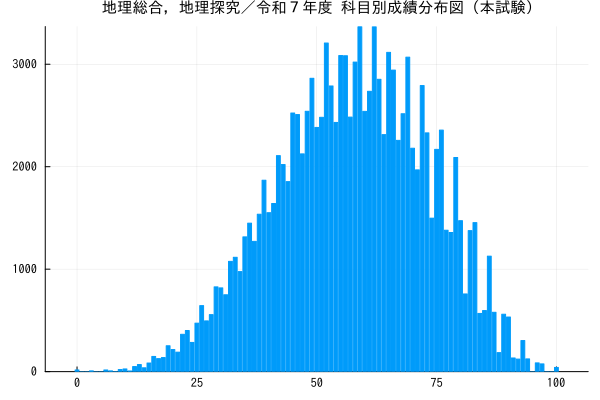

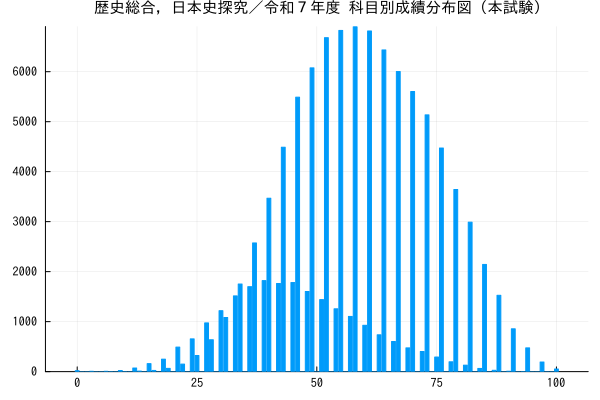

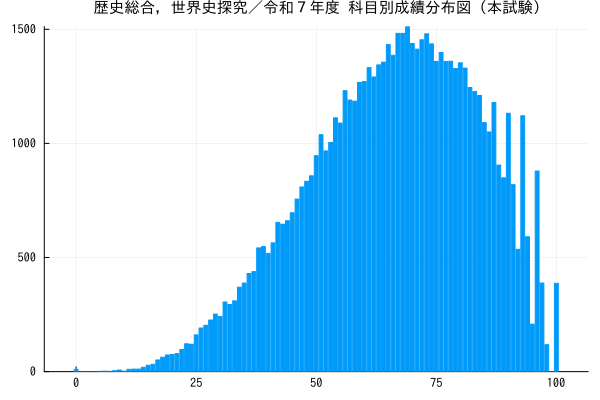

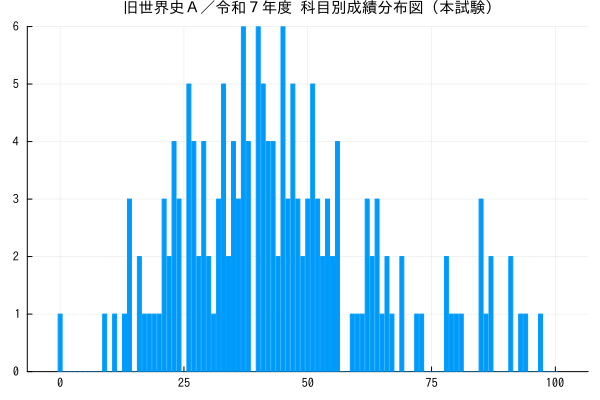

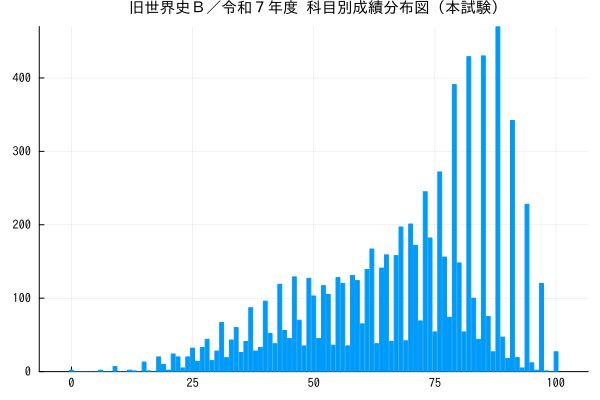

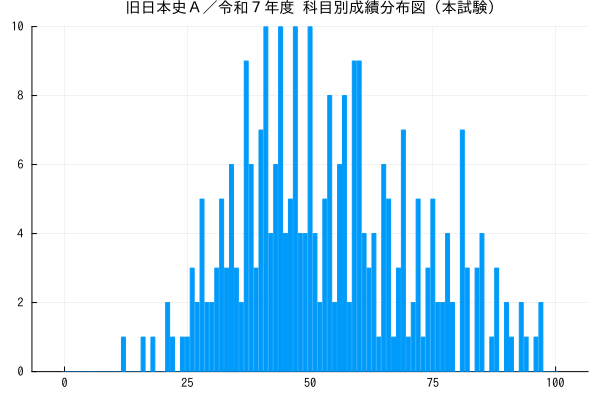

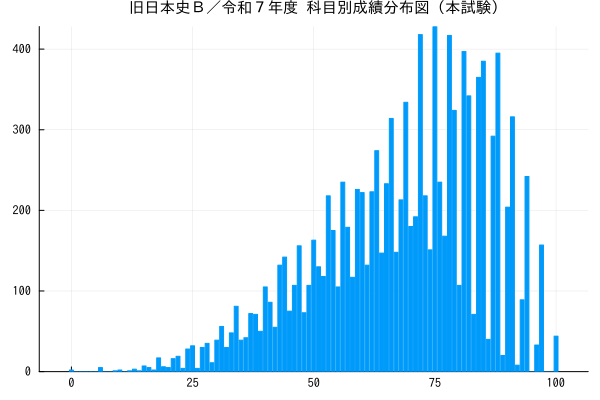

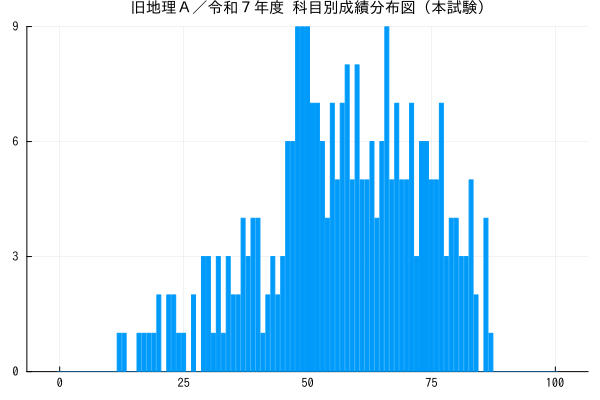

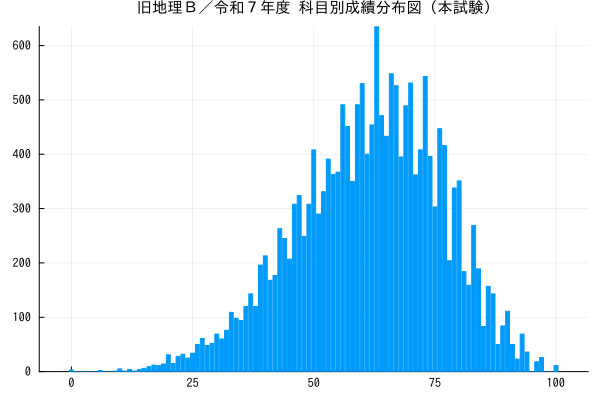

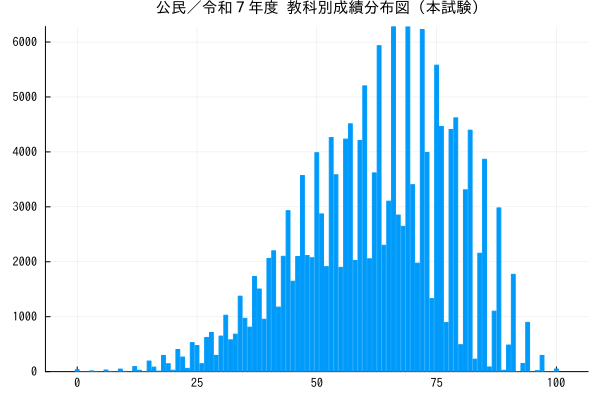

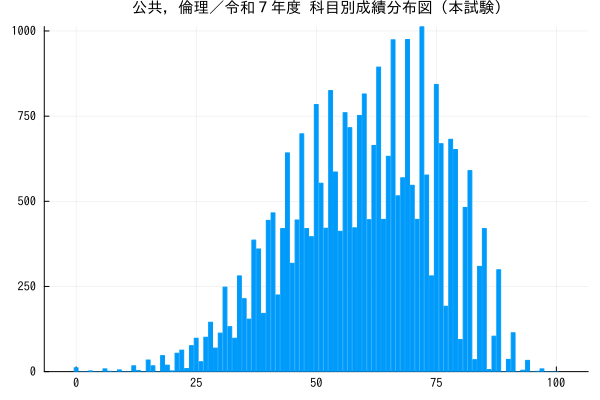

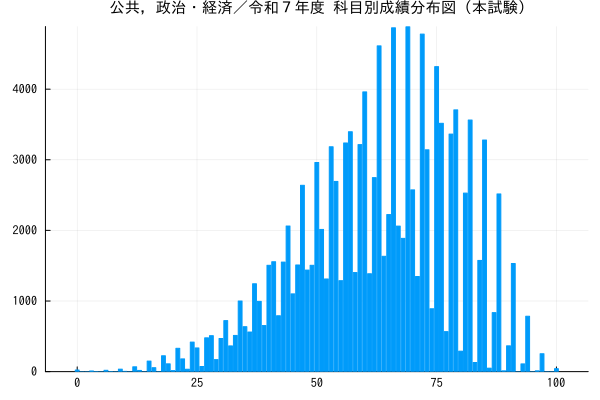

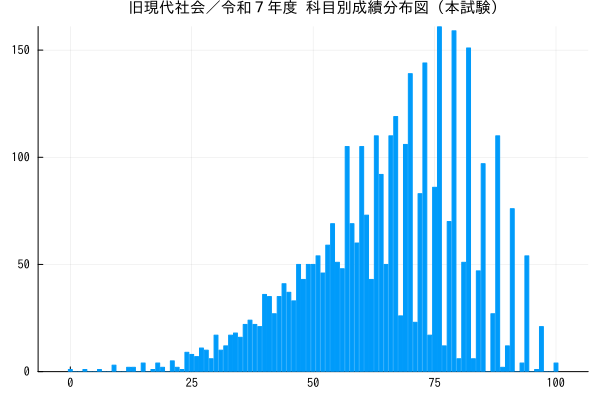

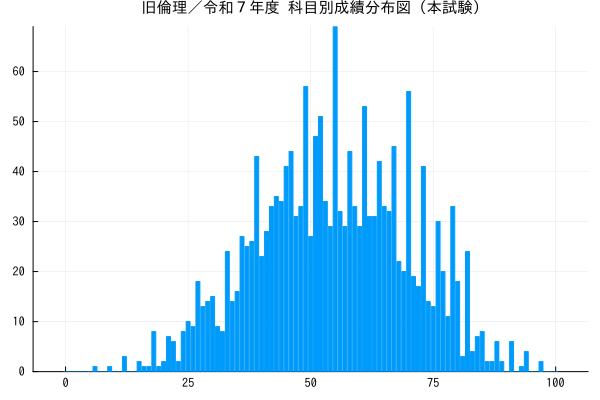

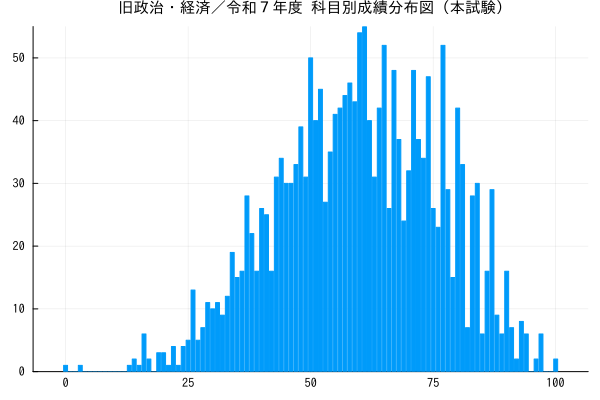

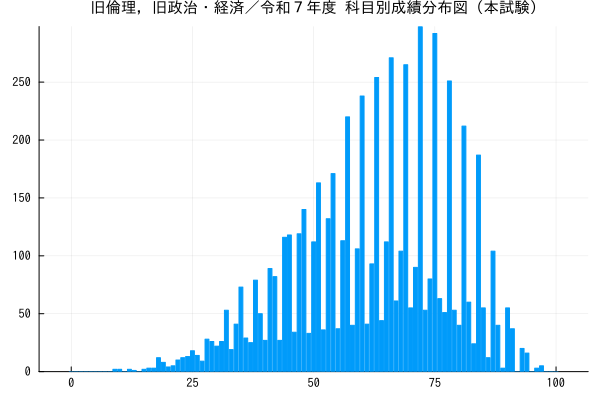

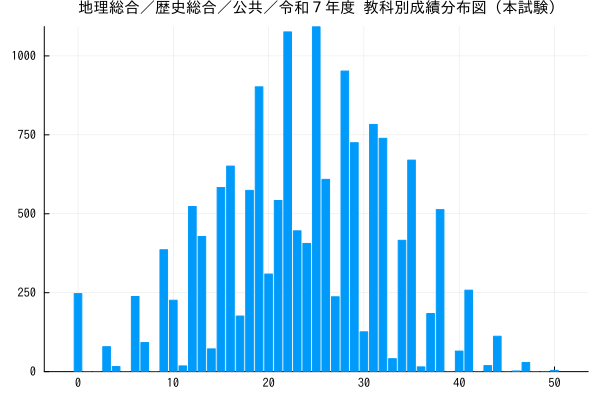

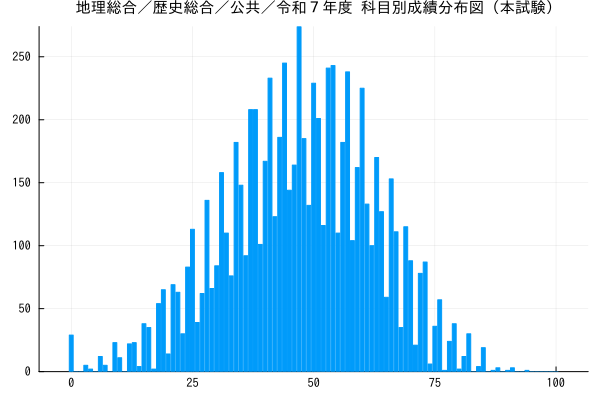

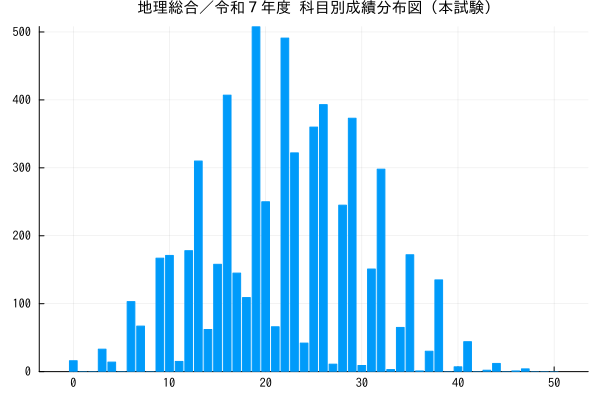

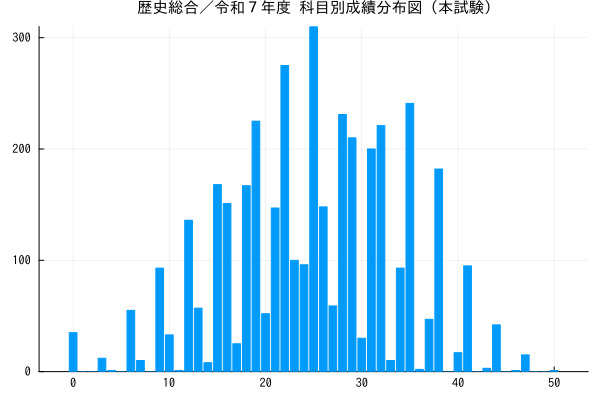

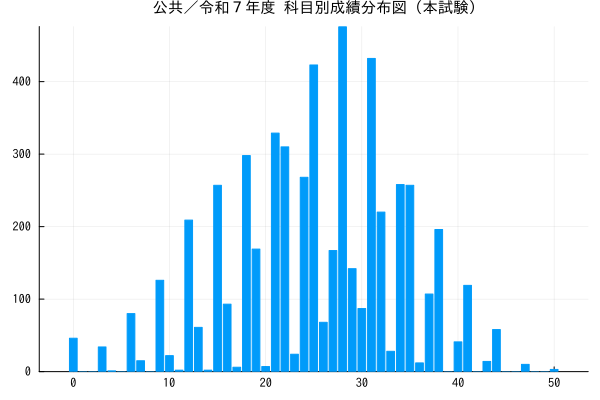

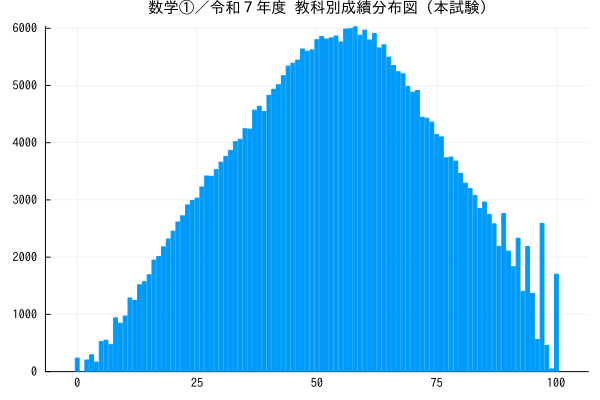

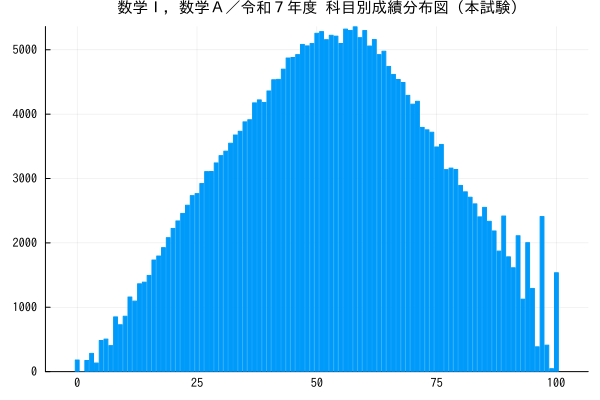

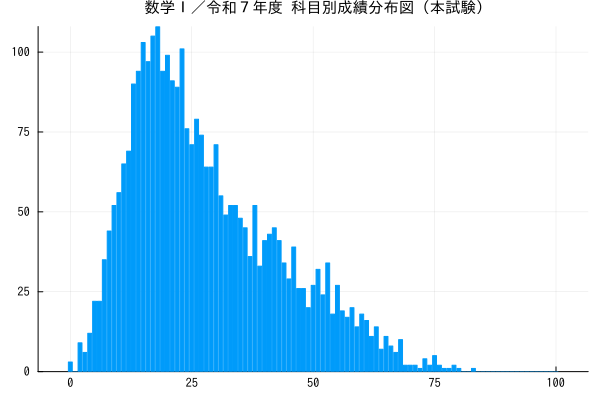

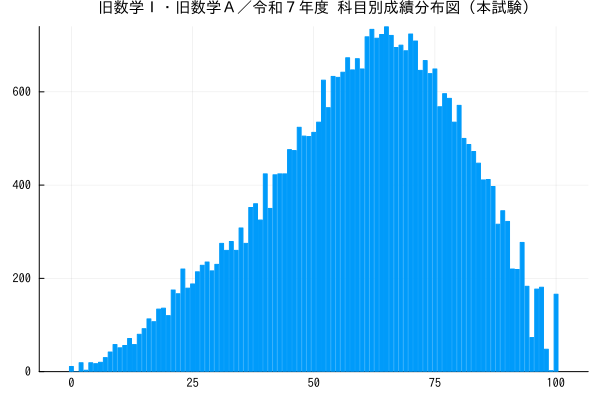

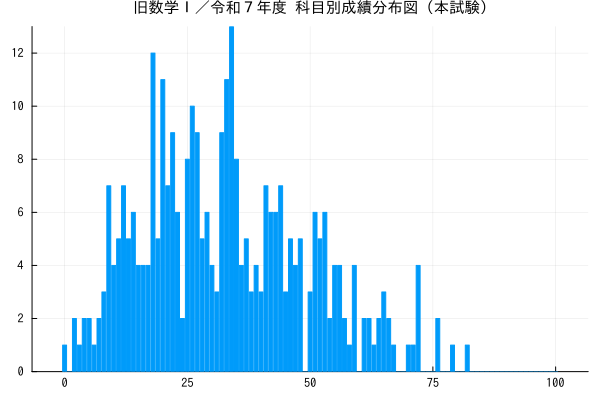

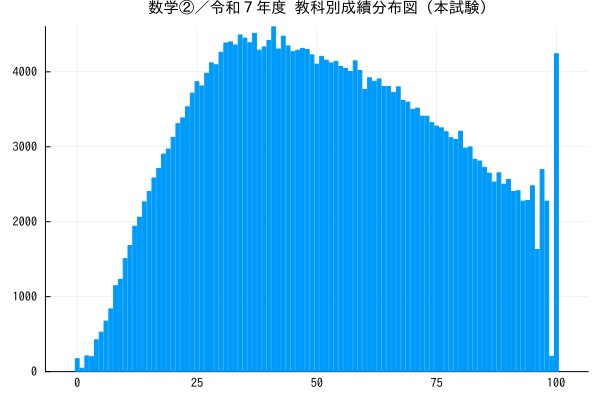

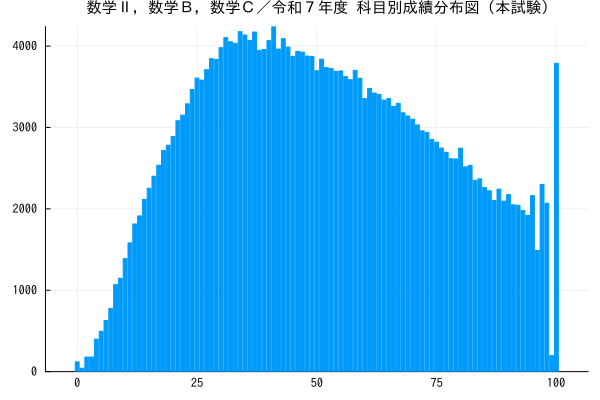

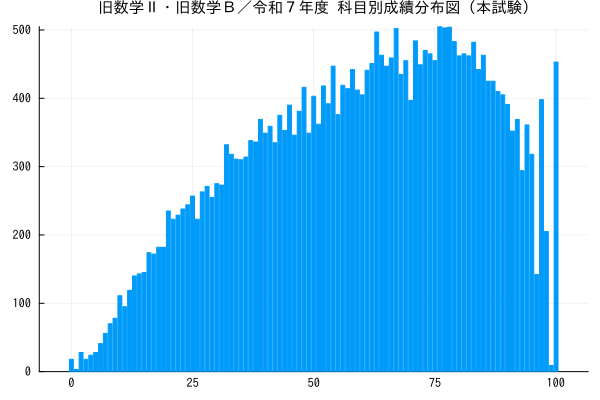

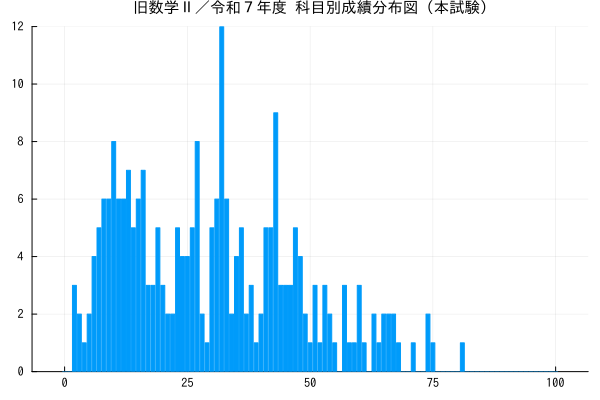

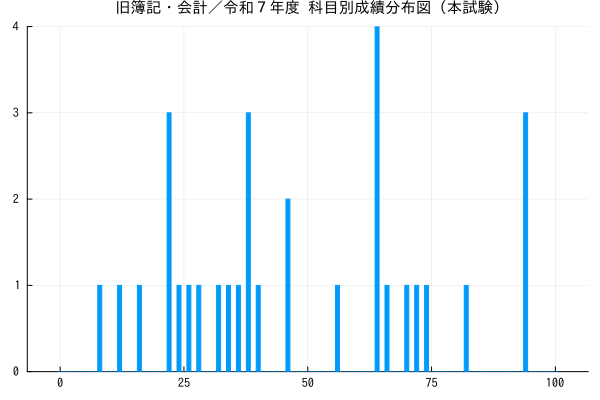

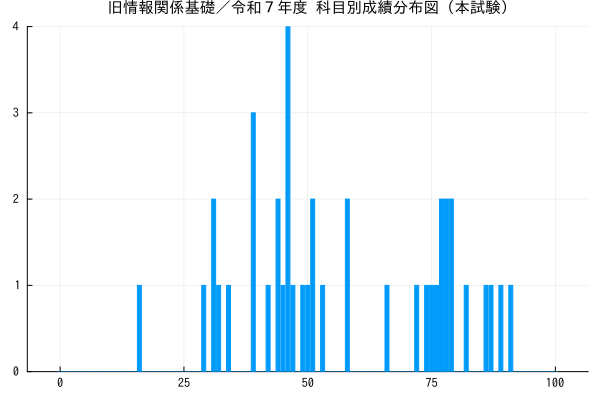

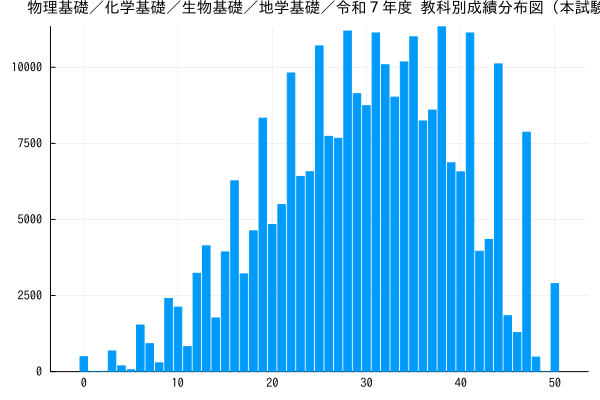

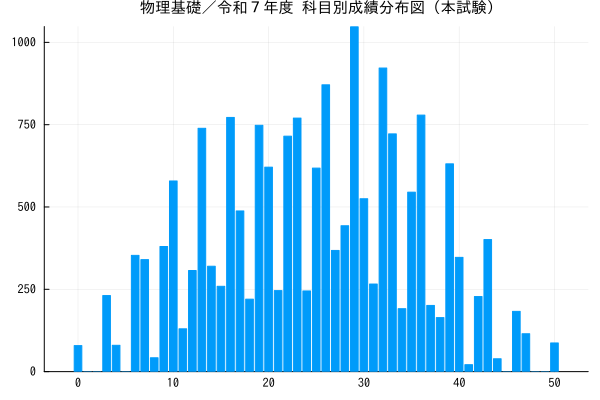

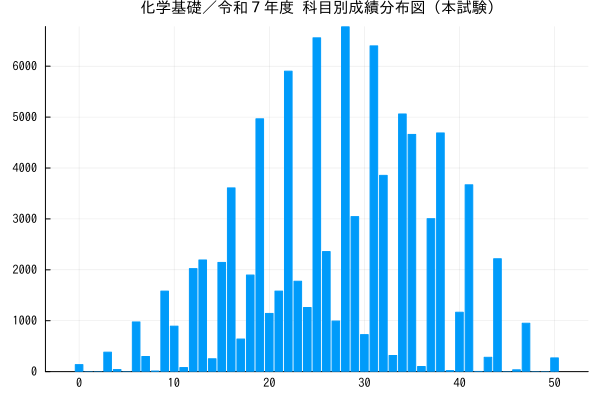

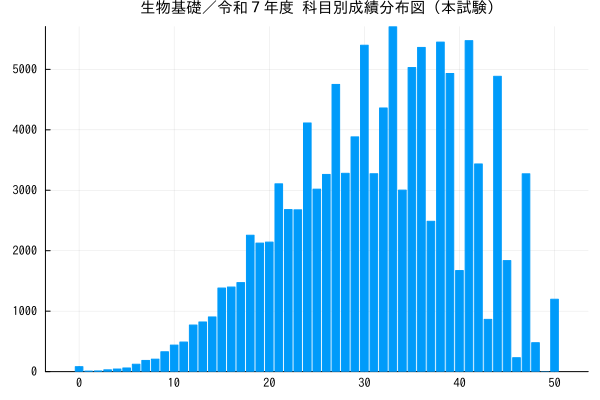

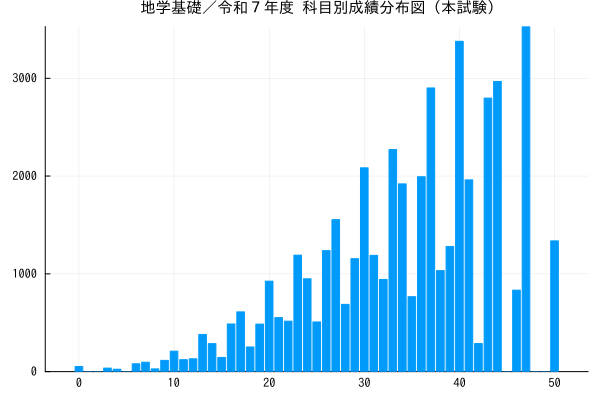

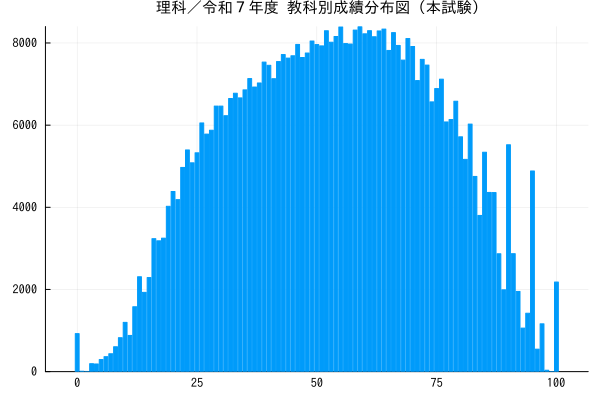

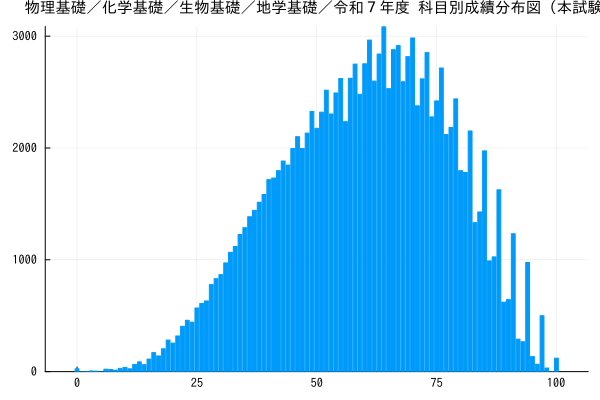

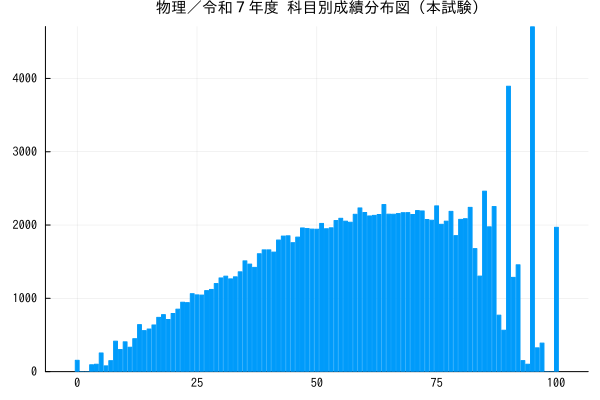

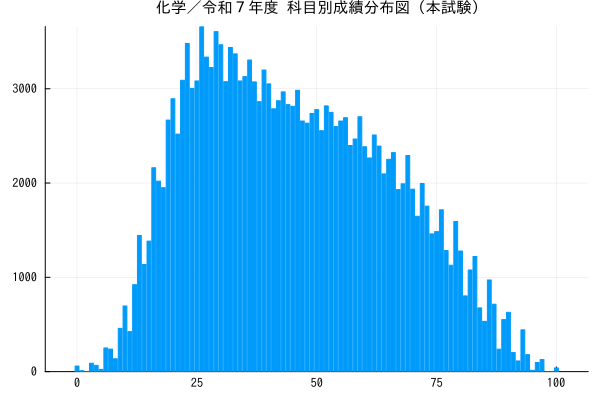

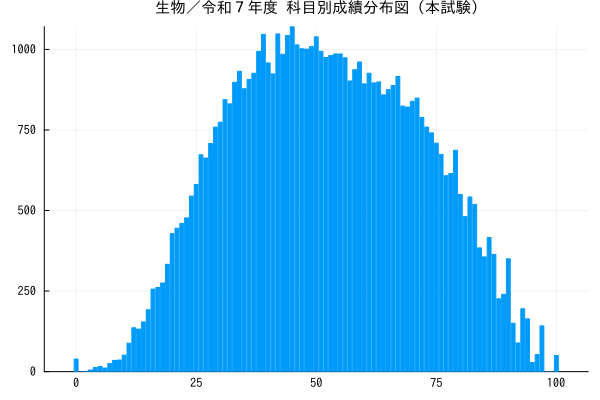

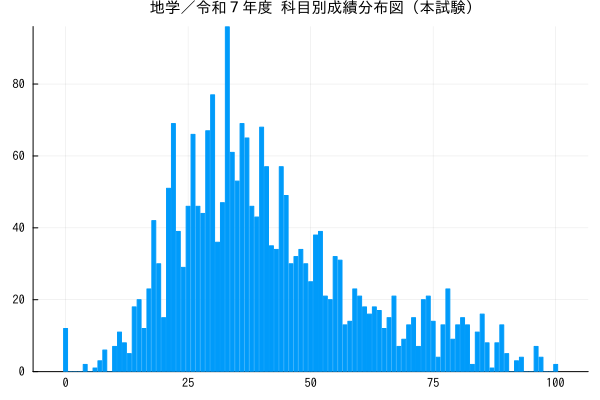

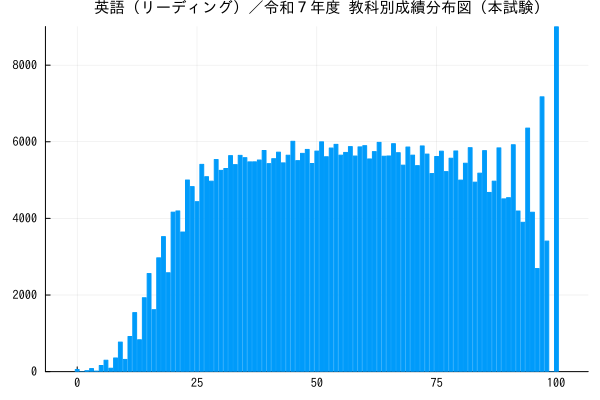

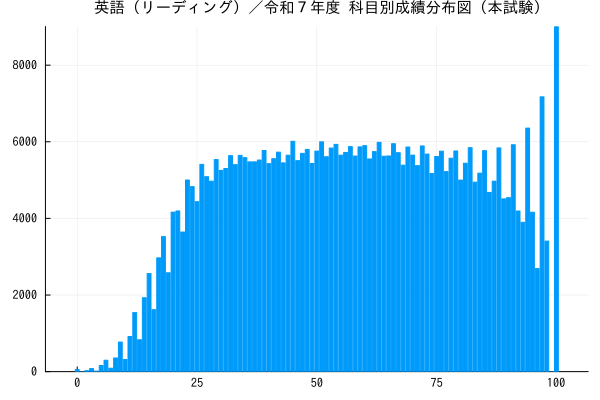

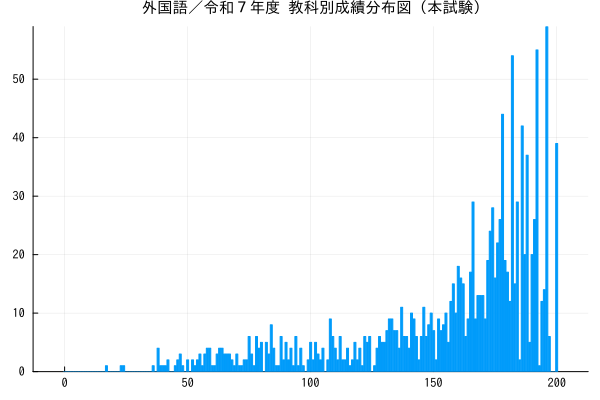

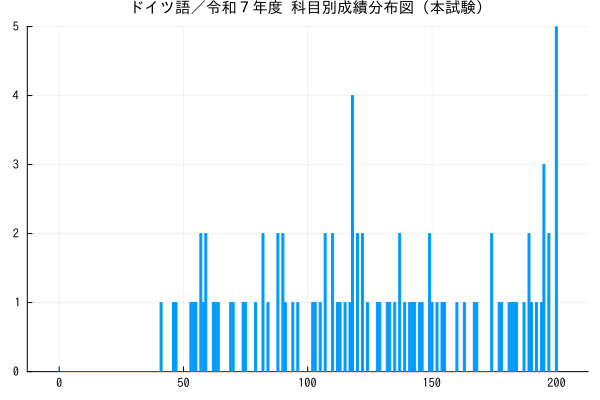

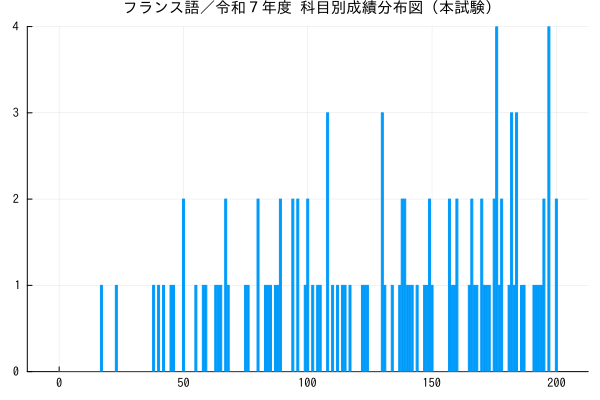

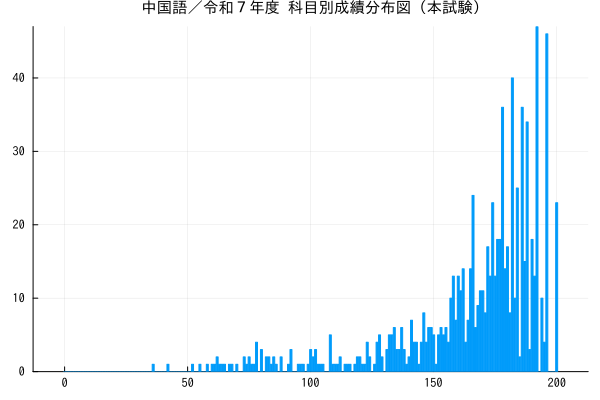

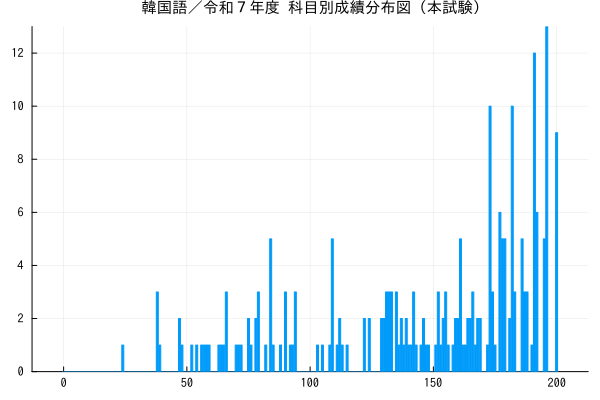

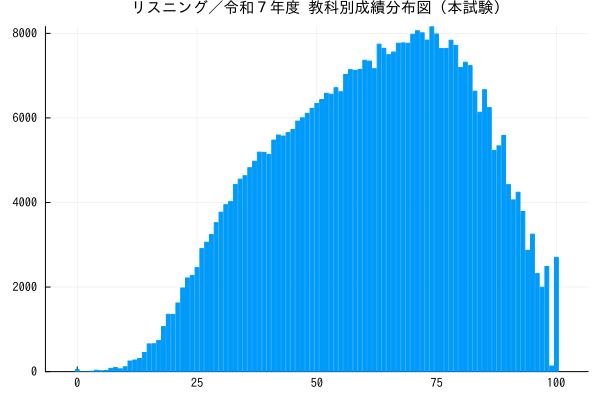

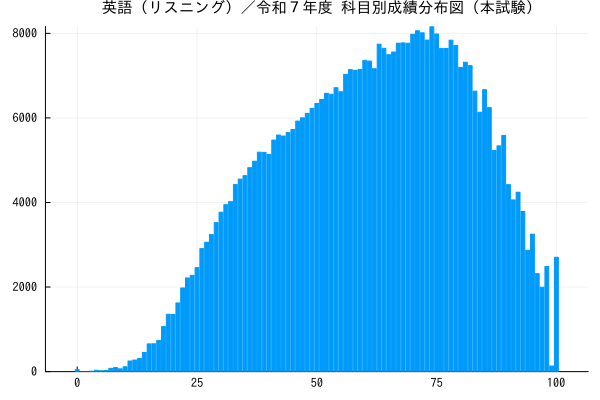

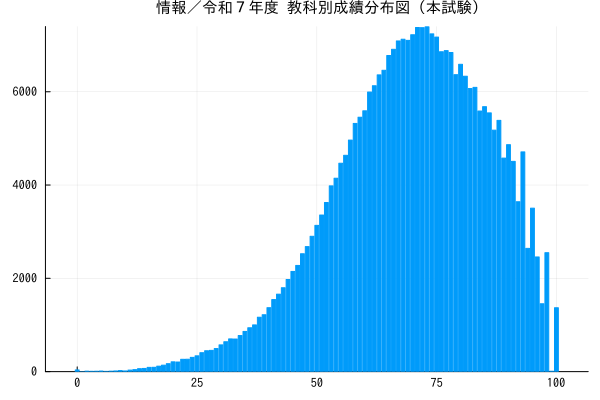

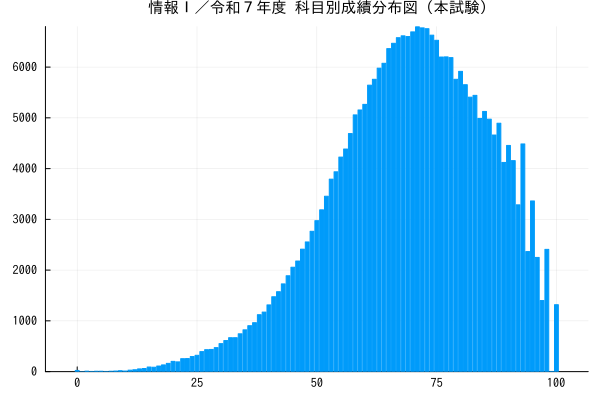

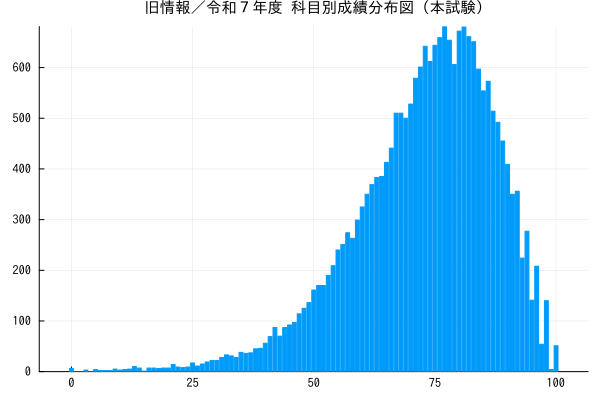

In [6]:
PP = []
for key in KEY
    x = DF[key][!, "点数"]
    y = DF[key][!, "人数"]
    P = bar(x, y; label="", linecolor=1)
    t = replace(key, "_"=>"／")
    title!(t)
    display(P)
end